# 

# Functions

Functions are an important part of creating reproducible research and
clean code. So far we have been using many useful functions from base R
and available packages by learning how to specify the inputs and use the
output. We now shift to writing our own functions. To start, we need to
understand the arguments and return values of functions as well as the
scope of objects used or created within functions. We also talk about
how to document, test, and debug your functions so that we can ensure
they are correct and easy to use. We use the **testthat** package to
create simple tests for our functions.

In [ ]:
library(testthat)
library(tidyverse)

One type of function we have already written is an *anonymous function*.
These are functions that are not saved or given a name. These functions
typically exist if we want to input a function argument to another
function but we don’t want to save that function for future use. For
example, in the following code, we use the `apply()` function on a data
frame to find the proportion of observations that are NA for each
column. Note that since the function is so short, it is easy enough to
define within the `apply()` function call by just including the code for
what is returned. For functions with more than one line, you would not
want to use an anonymous function and would need to define the function.

In [ ]:
df <- data.frame(x1 = c(NA, 1, 1, 0),
                 x2 = c(0, 1, 0, 0),
                 x3 = c(0, 0, NA, NA))
apply(df, 2, function(x) sum(is.na(x)) / length(x)) 

  x1   x2   x3 
0.25 0.00 0.50 

## Components of a Function

To start storing functions, we need to give them a name and define their
input (arguments) and output (return values). To do so, we assign a
function name to a function object as shown in the following code. This
example function has two arguments `arg1` and `arg2` and returns
`output`.

    function_name <- function(arg1, arg2){
      code to compute output from arguments
      return(output)
    }

Take a look at the following simple function. The name of this function
is `say_hello`, and there is no input (arguments) or output (return
values) associated with this function. Instead, it just prints out a
hello statement.

In [ ]:
say_hello <- function(){
  print("Hello!")
}

Running the previous code creates an object called `say_hello` of the
class `function`. We can run this function by calling it using empty
parentheses (since there are no input arguments).

In [ ]:
class(say_hello)

[1] "function"

In [ ]:
say_hello()

[1] "Hello!"

We can add to this function by instead adding our first argument called
`name` which is a string and then printing “Hello, \[name\]!”. In the
next code chunk, we use the `paste0()` function which concatenates the
string arguments into a single string.

In [ ]:
say_hello <- function(name){
  print(paste0("Hello, ", name, "!"))
}
say_hello("Weici")

[1] "Hello, Weici!"

### Arguments 

Arguments are inputs passed to functions so that they can complete the
desired computation. We can also have default values for these
arguments. In this case, those arguments do not have to be specified
when calling the function. For example, `rnorm(10)` uses the default
value for the mean to understand which distribution we want to use. In
the following function, we find the Euclidean distance from a given
(x,y,z) coordinate and the origin (0,0,0) with a default value of zero
for all values.

In [ ]:
dist_to_origin <- function(x = 0,y = 0,z = 0){
  return(((x - 0)^2 + (y - 0)^2 + (z - 0)^2)^(0.5))
}

If we call this function with no arguments, it uses all the default
values.

In [ ]:
dist_to_origin()

[1] 0

However, if we call the function with one argument, the function assumes
this first argument is `x`. Similarly, it assumes the second value is
`y` and the third value is `z`. If we want to give the arguments without
worrying about the order, we can specify them using their names (see the
last line in the following code chunk).

In [ ]:
dist_to_origin(1)

[1] 1

[1] 2.236068

[1] 3.741657

[1] 3.605551

Besides passing in numeric values, strings, data frames, lists, or
vectors, we can also pass other types of objects in as arguments to a
function. For example, we can take another function in as an argument.
In the next example, we create two functions. The first function
calculates the Euclidean distance between two points. The second one
computes the distance from a given point to the origin. Note that this
updated function to find the distance to the origin is more flexible and
written in a cleaner manner. First, it allows us to input a point of any
length. Second, it allows us to specify the distance function used. This
also demonstrates calling a function within another function.

Try out calling `euclidean_dist()` and `dist_to_origin()` on different
values.

In [ ]:
euclidean_dist <- function(pt1, pt2){
  # Finds the Euclidean distance from pt1 to pt2
  return(sqrt(sum((pt1- pt2)^2)))
}

dist_to_origin <- function(pt1, dist_func = euclidean_dist){
  # Finds the distance from pt1 to the origin
  origin <- rep(0, length(pt1))
  return(dist_func(pt1, origin))
}

dist_to_origin(c(1,1))

[1] 1.414214

### Practice Question

Write a function that calculates the Manhattan distance between two
points `pt1` and `pt2`, where the Manhattan distance is the sum of
absolute differences between points across all the dimensions. To check
your solution, you should check that the distance between points
`pt1 <- c(1,-1,1.5)` and `pt2 <- c(0.5, 2.5, -1)` is 6.5.

In [ ]:
# Insert your solution here:

Another type of argument to a function can be a formula. If you have
used linear regression in R, you have seen this in practice. In the
following code, we fit a simple linear model where we specify a model
formula `y~x` as the first argument. We are also using default arguments
for `rnorm()` on the first two lines.

In [ ]:
x <- rnorm(mean = 3, n = 100)
y <- x + rnorm(sd = 0.2, n = 100)

lm(y ~ x)


Call:
lm(formula = y ~ x)

Coefficients:
(Intercept)            x  
    -0.1511       1.0371  

### Return Values 

If we read the documentation for `lm()` by calling `?lm`, we can see
that there are a lot of arguments that have default values. The other
thing to note about the `lm` documentation is that there are multiple
values returned. In fact, the type of object returned is a list
containing all the different things we want to know about the results
such as the coefficients.

In [ ]:
simp_model <- lm(y ~ x)
simp_model$coefficients

(Intercept)           x 
 -0.1510947   1.0370961 

Since R only allows you to return one object, packaging the return
values into a list is a useful way to return multiple outputs from a
function. In the following example, we create a function `coin_flips()`
that takes in a probability `prob` and a number of iterations `n` (with
default value 10) and simulates `n` coin flips where the coin has a
probability of `prob` of landing on heads. The function returns the
percentage of trials that were heads and the results of the coin flips.
We can access each of these returned values by using the names
`percent_heads` and `results`.

In [ ]:
coin_flips <- function(prob, n = 10){
  # Flips a coin with probability prob of heads for n trials
  
  results <- rbinom(n = n, size = 1, prob = prob)
  return(list(percent_heads = sum(results)/n, results = results))
}
trial <- coin_flips(0.6)
trial$percent_heads

[1] 0.4

 [1] 0 1 1 0 0 0 0 0 1 1

One important thing to know about R and return values: if you don’t
specify a return statement but assign the output of our function to an
object, it will assign the value to the last computed object by default.
In the following code, the value returned is 3. Avoid unexpected
behavior by always using the `return()` function.

In [ ]:
ex_return <- function(){
  x <- 2
  y <- 3
}
result <- ex_return()
result

[1] 3

### Scope of Objects 

When working within functions and calling functions, we want to remember
the scope of our objects. *Global objects* are objects defined outside
of functions. These values can also be accessed outside or inside
functions. For example, the object `y` is defined outside of a function
and so is a global object, meaning we can use its value inside the
function.

In [ ]:
y <- "Cassandra"

ex_scope <- function(){
  return(paste("Hey,", y))
}

ex_scope()

[1] "Hey, Cassandra"

If we change the value of a global object within a function however, it
does not update the value outside of the function. In the subsequent
code chunk, we add 1 to `y` inside the function, but it does not change
the value of `y` after the function is done. Every time we run a
function, R creates a new sub-environment inside, which can access the
values of global objects but also creates its own *local objects*. In
this case, the function creates its own object `y`, which is a local
object that is a copy of the original object.

As another example, the function also creates a local object called `z`
which ceases to exist after we run the function. If we try to print `z`
on the last line, we would get an error that `z` is not found. All
objects created inside functions only exist in that sub-environment and
are erased when we are no longer in the function. Therefore, we want to
make sure we return any values we want to store.

In [ ]:
y <- 5

ex_local <- function(x){
  y <- y + 1
  z <- x * y
  return(y + z)
}

ex_local(2)

[1] 18

[1] 5

To update global objects within a function, you can use the `<<-`
operator (global assignment operator). This looks for an object in the
global environment and updates its value (or creates an object with this
value if none is found). For example, the following function updates the
value of the global objects `y`. As a general practice, we should be
careful using global objects within a function, and it often is safer to
use input arguments and return values instead.

In [ ]:
y <- 5

ex_update_global <- function(x){
  y <<- y + 1
  return(y + x)
}

ex_update_global(2)

[1] 8

[1] 6

### Functions within Functions and Returning Functions  

Sometimes we see functions written inside other functions. Writing
functions within functions can be useful to separate out some part of
the code or to give that function access to the local environment
objects. In the following example, the inner function has access to the
value of `x` even though we have not passed it as an argument. The
downside of this structure is that the function `add_x()` does not exist
outside the function, so we cannot call it in other code.

In [ ]:
add_x_seq <- function(x){
  # Adds x to 1:10 and returns
  add_x <- function(y){
      return(y + x)
  }
    
  return(add_x(1:10))
}

add_x_seq(3)

 [1]  4  5  6  7  8  9 10 11 12 13

If we want to use the created function, we can return it. In the updated
example, we return an anonymous function. By doing so, we create a
unique function for each `x` value.

In [ ]:
add_x <- function(x){
  # Returns a function to add x to any value
  return(function(y) y + x)
}

add2 <- add_x(2)
add2(1:10)

 [1]  3  4  5  6  7  8  9 10 11 12

 [1] 11 12 13 14 15 16 17 18 19 20

## Documenting Functions 

The functions we wrote had minimal comments or documentation. When
creating functions, we should document them including any information
about the format of the input and output. We do so using comments that
precede the function and start with `#'`. This style of function
documentation is called *roxygen*. The following code chunk shows an
example for our Euclidean distance function. You can see we provided
information about the two arguments and the return value. The roxygen
style is the style used for published R packages.

In [ ]:
#' Euclidean distance
#' 
#' @description Calculates the Euclidean distance between two points
#'
#' @param pt1 numeric vector 
#' @param pt2 numeric vector 
#' @return the Euclidean distance from pt1 to pt2
euclidean_dist <- function(pt1, pt2){
  return((sum((pt1 - pt2)^2))^0.5)
}

Each comment should start with a pound sign and backtick. The first
block of lines is the introduction, and the first line of the comment
block is reserved for the title. This is the first information we want
the user to know about the function and should be a single line. For all
other information besides the title, we use certain tags.

-   `@description` This tag should be placed first and is a place where
    you can briefly put more information about the function beyond the
    title. You can also add more details with the `@details` tag.

-   `@param` This tag comes before each input argument’s description.
    For each argument, we want to include the name and type, but we
    might also include information on how that argument is used.

-   `@return` This tag documents the returned object and specifies the
    type. If we are returning a list, then we might include information
    about each object in the list.

### Practice Question

Write the documentation for the following coin flip function.

In [ ]:
#' Insert your solution here:
coin_flips <- function(prob, n = 10){
  results <- rbinom(n = n, size = 1, prob = prob)
  return(list(percent_heads = sum(results)/n, results = results))
}

## Debugging and Testing 

As we write more complex code and functions, we want to learn how to
test our code. When it comes to testing code, a good mantra is “test
early and test often”. So avoid writing too much code before running and
checking that the results match what you expect. Here are some simple
principles that are applicable to debugging in any setting.

-   Start simple and build up in steps.
-   Check your syntax by checking that all parentheses (), brackets
    \[\], and curly braces {} match where you expect.
-   Check that object names are correct and you don’t have any
    accidental typos or that you are accidentally using the same name
    for different objects.
-   Restart your R session and re-run all code.
-   Check if you use the same object name for different objects.
-   Localize your error by printing out the values of objects at each
    stage or use break points in R.
-   Modify your code one piece at a time and check all test values again
    to avoid introducing new errors.

For example, suppose we want to write a function that finds any pairs of
numeric columns with a Pearson correlation with absolute value above a
certain threshold. We want our code to be structured so that it makes
sense, is flexible to our needs, and avoids unnecessary work. To start
building up this function, we need to first think about the inputs and
outputs we want. This is called a *top-down approach*. Sketching out the
overall steps your code needs to complete before writing any of them can
help to improve your structure and avoid having to rewrite large pieces.

In this case, our input to this function is a data frame which could
contain a mixture of numeric and categorical columns and a threshold
correlation value with a default value of 0.6. We want to return a data
frame with the pairs and their correlation. This gives us a template for
our documentation.

In [ ]:
#' Find pairs of columns with strong correlation
#' 
#' @description Finds all pairs of numeric columns with strong Pearson 
#' correlation and returns the pairs in a data frame
#' 
#' @param df data frame
#' @param threshold positive numeric threshold value to define a 
#' strong correlation as one with absolute value above the threshold
#' @return data frame with one row for each pair of columns
#' with high correlation containing the names of the columns 
#' and the corresponding correlation
high_cor <- function(df, threshold = 0.6){
  return()
}

Next, to start simple, we want to create some artificial data we can use
to test our function. We use the `mvnrorm()` function from the **MASS**
package \[@R-MASS\] to control the correlation between our columns and
add in a categorical column that should be ignored by our function.

In [ ]:
set.seed(4)
cor_mat <- matrix(c(1, 0.9, 0.4, 0,
                    0.9, 1, 0.3, 0,
                    0.4, 0.3, 1.0, 0,
                    0, 0, 0, 1.0), nrow = 4)
m <- round(MASS::mvrnorm(100, c(0,0,0,0), Sigma = cor_mat), 3)
test_df <- as.data.frame(m)
test_df$V5 <- sample(c("A", "B", "C"), 100, replace = TRUE)
high_cor(test_df)

NULL

We can use the `cor()` function to find the Pearson correlation.

In [ ]:
cor(test_df[,-5])

            V1          V2         V3          V4
V1  1.00000000  0.90063191  0.3240977 -0.07971811
V2  0.90063191  1.00000000  0.2912118 -0.07023691
V3  0.32409773  0.29121175  1.0000000 -0.23064831
V4 -0.07971811 -0.07023691 -0.2306483  1.00000000

Great, now let’s roughly sketch out the steps we need to complete.

1.  Subset the data to only numeric columns.
2.  Find the correlation of all pairs of columns.
3.  Check if a pair has a strong correlation.
4.  If so, add it to our results.

Let’s start with step 1. Before putting code into our function, we are
going to test our steps on our example data. To do so, we use the
`select_if()` function from the **dplyr** package.

In [ ]:
df_numeric <- select_if(test_df, is.numeric)
head(df_numeric)

      V1     V2     V3     V4
1 -0.656  0.417  1.188  0.685
2  0.117 -0.336 -1.611 -0.115
3  1.229  0.617  0.241 -0.356
4  0.478  0.121  1.176 -0.106
5  1.546  1.914  0.366  0.045
6  0.416  0.110  1.630 -1.726

This worked. Next we need to find the strong correlations. Now, we can
use the correlation function to find the correlations. We then want to
iterate through all pairs to check if the absolute value of the
correlation is above our threshold. We use a loop for this. In our first
attempt, we create a nested for loop where `i` is the index of one
column and `j` is the index of the second column in the pair. We can see
we must have some mistakes because we are getting pairs where `i` and
`j` are equal to each other, and we are also getting zeros. Note how we
are using print statements. This helps us to identify that we need to
add parentheses for the first for loop, and we need to update `j` to
start at `i+1`.

In [ ]:
cor_mat <- cor(df_numeric)
for (i in 1:nrow(cor_mat) - 1){
  for (j in (i:nrow(cor_mat))){
    print(paste(i, j))
  }
}

[1] "0 0"
[1] "0 1"
[1] "0 2"
[1] "0 3"
[1] "0 4"
[1] "1 1"
[1] "1 2"
[1] "1 3"
[1] "1 4"
[1] "2 2"
[1] "2 3"
[1] "2 4"
[1] "3 3"
[1] "3 4"

Let’s try again. This time we create a variable `n` which is the number
of columns.

In [ ]:
cor_mat <- cor(df_numeric)
n <- nrow(cor_mat)
for (i in 1:(n-1)){
  for (j in ((i+1):n)){
    print(paste(i, j))
  }
}

[1] "1 2"
[1] "1 3"
[1] "1 4"
[1] "2 3"
[1] "2 4"
[1] "3 4"

Next, we need to add an if statement to check whether there is a
correlation above the given threshold. In this case, to check if our
code is working correctly, we use a print statement for only those that
meet the condition.

In [ ]:
n <- nrow(cor_mat)
for (i in 1:(n-1)){
  for (j in ((i+1):n)){
    if(abs(cor_mat[i,j]) > 0.6){
      print(paste(i, j))
    }
  }
}

[1] "1 2"

We have sketched out our code more thoroughly, so we have a good idea of
how we want to compute our result. We now move to writing our function.
Importantly, we need to make sure that we use our input arguments now
rather than our test values. In the subsequent version, we also add in a
results data frame that we use to keep track of our results, and we add
an additional argument for how to deal with NA values in calculating the
correlations. The output matches what we expect for our test data frame.

In [ ]:
#' Find pairs of columns with strong correlation
#' 
#' @description Finds all pairs of numeric columns with strong Pearson 
#' correlation and returns the pairs in a data frame
#' 
#' @param df data frame
#' @param threshold positive numeric threshold value to define a 
#' strong correlation as one with absolute value above the threshold
#' @param use an optional character string giving a method for 
#' computing correlations in the presence of missing values. 
#' This must be (an abbreviation of) one of the strings "everything", 
#' "all.obs", "complete.obs", "na.or.complete", or 
#' "pairwise.complete.obs".
#' @return data frame with one row for each pair of columns
#' with high correlation containing the names of the columns 
#' and the corresponding correlation
high_cor <- function(df, threshold = 0.6, use = "everything"){
  
  # create result data frame
  res <- data.frame(name1 = vector("character"),
                    name2 = vector("character"),
                    cor = vector("numeric"))
  
  # subset to numeric columns
  df_numeric <- select_if(df, is.numeric)
  
  # find correlations and variable names
  cor_mat <- cor(df_numeric, use = use)

  # go through pairs to find those with high correlations
  n <- nrow(cor_mat)
  for (i in 1:(n-1)){
    for (j in ((i+1):n)){
      if(abs(cor_mat[i,j]) > threshold){
        res <- add_row(res, 
                       name1 = colnames(cor_mat)[i],
                       name2 = colnames(cor_mat)[j],
                       cor = cor_mat[i,j])
      }
    }
  }
  return(res)
}
high_cor(test_df)

  name1 name2       cor
1    V1    V2 0.9006319

We can prevent unexpected behavior of our functions by using `stop()`
functions to limit a function to be run on certain types of arguments.
This is helpful if other people will use your function or if you might
forget any assumptions you built into the function. The `stop()`
function stops the execution of the current expression and returns a
message. In the following example, we check to make sure that the point
given is a numeric vector. Further, we check to see whether the vector
has length 0 and return 0 if it does.

In [ ]:
#' Distance to the origin
#' 
#' @description Calculates the distance from a single numeric vector 
#' to the origin
#'
#' @param pt1 numeric vector 
#' @param dist_fun function to compute the distance with, default is
#' Euclidean distance
#' @return the distance from pt1 to origin in the same dimension
dist_to_origin <- function(pt1, dist_func = euclidean_dist){
  
  # check format of input
  if(!(is.vector(pt1) & is.numeric(pt1))){
    stop("pt1 must be a numeric vector")
  }
  if(length(pt1) == 0){
    return(0)
  }
  
  # calculate the distance
  origin <- rep(0, length(pt1))
  return(dist_func(pt1, origin))
}

### Unit Tests 

We know our function `high_cor()` works on a single example. To
thoroughly test our functions, we want to run them on several different
input values. These types of tests are called *unit tests*. We try to
vary these test values to cover a wide range of possibilities. For
example, for a numeric argument, test positive and negative input
values. For a vector input, test an empty vector, a vector of length 1,
and a vector with multiple values. If you discover an error, we need to
go back to debugging mode to resolve it.

To test our function, we use the **testthat** package \[@R-testthat\].
This includes several functions that can check our expectations. For
example, there is the `expect_equal(object, expected)` function which
checks whether `object` matches `expected` up to a given numeric
tolerance. If we want to only check the values of our objects but not
the attributes, we can set the argument `ignore_attr = FALSE`. Other
functions from this package are `expect_error(object)` which can be used
to test that an error message was returned and `expect_true(object)`
which can be used to test whether a condition is met.

In [ ]:
testthat::expect_equal(paste0("A","B"), "AB")
testthat::expect_true(mean(c(1,2,3)) > 1)

In the following code chunk, we demonstrate some tests for the
`dist_to_origin()` function. Our tests here focus on the format of the
vector. We should test each function separately, so we would write a
separate batch of tests for the Euclidean distance function.

In [ ]:
# check error message for character vector
expect_error(dist_to_origin(c("A")), 
                       "pt1 must be a numeric vector")

# check error message for not a vector
expect_error(dist_to_origin(matrix(0)), 
                       "pt1 must be a numeric vector")

# check for empty numeric vector
testthat::expect_equal(dist_to_origin(vector("numeric")), 0)

# check length 1 vector
testthat::expect_equal(dist_to_origin(c(2)), 2)
                       
# check length 3 vector
testthat::expect_equal(dist_to_origin(c(2,8.5,3)), 9.233093,
                       tolerance = 0.0001)

### Practice Question

Following are a series of tests for the function `high_cor()` with
different data frame sizes and types of columns. Unfortunately, not all
of the tests are working. Use your debugging skills to fix the function
to pass the tests and write at least one additional test.

In [ ]:
# mixed data frame - should return a data frame with three columns
expect_equal(high_cor(test_df), 
             data.frame(name1 = "V1", name2 = "V2",
                        cor = 0.9011631), tolerance = 0.001)

# change threshold - lower, should have three pairs
expect_equal(high_cor(test_df, 0.2)$cor, 
             c(0.9011631, 0.31765407, 0.30748633), 
             tolerance = 0.001)

# change threshold - higher, should be empty
expect_equal(high_cor(test_df, 0.95)$cor, vector("numeric"), 
             tolerance = 0.001)

# single numeric column - should return an empty data frame
expect_equal(high_cor(test_df[,4:5])$cor, vector("numeric"))

# single row - should return an empty data frame
expect_equal(high_cor(test_df[1,])$cor, numeric())

## Exercises

For each question, be sure to document your function(s) using roxygen
style documentation.

1.  Standardizing a variable means subtracting the mean and then
    dividing through by the standard deviation. Create a function called
    `standardize_me()` that takes a numeric vector as an argument, and
    returns the standardized version of the vector. Write at least three
    unit tests to check that the result is correct.

2.  Suppose we have two binary vectors `x` and `y` each of length $n$.
    Let $m_{1}$ be the number of indices where `x` or `y` has a 1 and
    $m_2$ be the number of indices where both `x` and `y` equal 1. For
    example, if `x <- (1,1,0)` and `y <- c(0,1,0)` then $m_1 = 2$ and
    $m_2 =1$. The Jaccard distance is defined as $1-m_2/m_1$ and
    measures the dissimilarity between two binary vectors. Write a
    function `jaccard_dist()` that takes in two binary vectors and
    returns the Jaccard distance between the two.

3.  For this question we use a subset of the `pain` data from the
    **HDSinRdata** package. Recall, that this data contains binary
    variables representing where people experienced pain. Write a
    function that takes in a data frame with all binary columns and
    returns a matrix with the Jaccard distance between all observations.
    That is, if `D` is the returned matrix, then `D[i,j]` is the Jaccard
    distance between observation `i` and observation `j`. Apply your
    function to the pain data and plot the distribution of these
    distances.

    ``` r
    library(HDSinRdata)
    ```

        Warning: package 'HDSinRdata' was built under R version 4.4.1

    ``` r
    pain_sub <- pain[1:500,]
    ```

4.  The function in the following code chunk is supposed to take in a
    positive integer and calculate how many positive integer divisors it
    has (other than 1 and itself). However, the function is not getting
    the right results. Debug the function. Then, think about ways you
    could improve this function by changing the structure,
    documentation, and adding argument checks.

    ``` r
    total <- 0
    divisors <- function(x){
      for(i in 1:x){
        if (i %% x){
          total <- total + 1
          i <- i + 1
        }
      }
      return(total)
      }

    divisors(2)
    ```

        [1] 1

    ``` r
    divisors(6)
    ```

        [1] 5

5.  In this problem, you create our own summary table. To start, create
    a function that takes in a data frame and returns a summary table
    that reports the mean and standard deviation for all continuous
    variables and the count and percentage for all categorical
    variables. An example is given in
    <a href="#fig-summary-table" class="quarto-xref">Figure 1</a>. Call
    your function on the NHANES dataset with the columns selected in the
    subsequent code to match what is shown in the figure. 

    ``` r
    nhanes_df <- NHANESsample %>%
      select(c(AGE, SEX, LEAD, HYP, SMOKE))
    ```

<figure id="fig-summary-table">
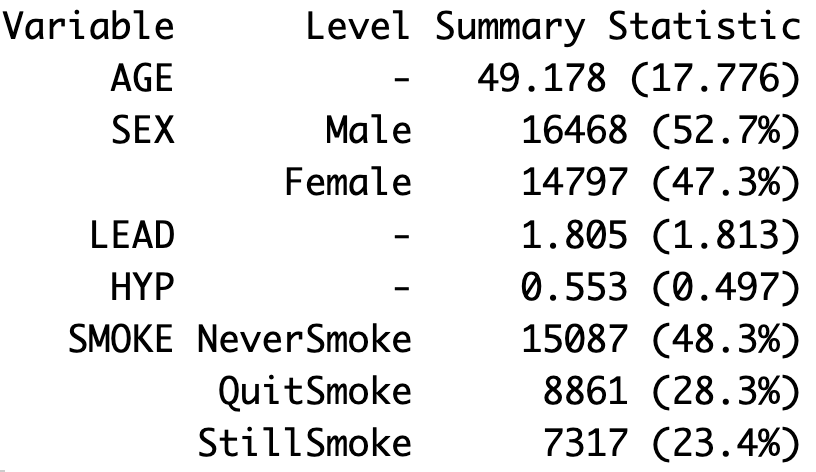
<figcaption>Figure 1: Example Summary Table.</figcaption>
</figure>